In [3]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Step 1. Load the dataset
# Credits:  California Cooperative Oceanic Fisheries Investigations
# URL: https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv
# Drescription: The CalCOFI data set represents the longest (1949-present) 
# and most complete (more than 50,000 sampling stations) time series of 
# oceanographic and larval fish data in the world. It includes abundance 
# data on the larvae of over 250 species of fish; larval length frequency 
# data and egg abundance data on key commercial species; and oceanographic 
# and plankton data. The physical, chemical, and biological data collected 
# at regular time and space intervals quickly became valuable for 
# documenting climatic cycles in the California Current and a range of 
# biological responses to them. 
df_raw = pd.read_csv('../data/raw/calcofi_reduced.csv',index_col=0)

In [9]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [10]:
# 1.2 Take a sample
df_raw.sample(10)

,Salnty,T_degC
23,33.806,7.98
135,32.750,9.62
13,34.040,6.80
179,34.180,4.37
60,34.340,3.99
53,33.833,7.50
93,33.302,9.73
100,32.738,9.85
267,33.440,10.46
114,34.268,3.63


In [ ]:
# 1.3 Transform if needed
# variables categóricas o variables fechas
# esa transformación afecta a todo el dataset (antes de dividirlo)

In [11]:
# Step 2. Make a basic EDA
# después de transformar datos crudos hacemos una copia y lo pasamos a la carpeta interim
df=df_raw.copy() 

In [12]:
# 2.1 Split the dataset so to avoid bias
X=df['Salnty']
y=df['T_degC']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)


In [13]:
# 2.2 Join the train sets to ease insights
# el corte por default es 0,75 para train 
df_train=pd.DataFrame({'Salinity':X_train,'Temperature':y_train})



In [14]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 243 to 219
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salinity     225 non-null    float64
 1   Temperature  225 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


In [15]:
# 2.4 Take a sample
df_train.sample(10)

,Salinity,Temperature
130,33.272,9.04
267,33.440,10.46
224,33.950,6.05
196,33.010,12.00
64,33.993,4.67
299,32.810,11.52
86,33.807,7.42
188,34.380,3.08
106,33.638,8.11
7,34.343,3.32


In [16]:
# 2.5 Describe the numerical and date variables
df_train.describe()


,Salinity,Temperature
count,225.000000,225.000000
mean,33.605831,7.937244
std,0.559792,2.996976
min,32.630000,2.780000
25%,33.000000,5.020000
50%,33.800000,8.180000
75%,34.101000,10.470000
max,34.430000,12.660000


In [ ]:
# 2.6 Describe the categorical variables
# utilizar value.count pasar a numéricas

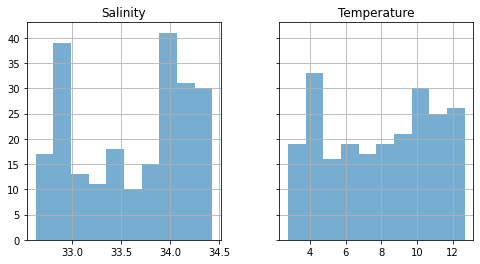

In [17]:
# 2.7 Perform univariate analysis - histograms
df_train.hist(figsize=(8,4),sharey=True,alpha=0.6)
plt.show()

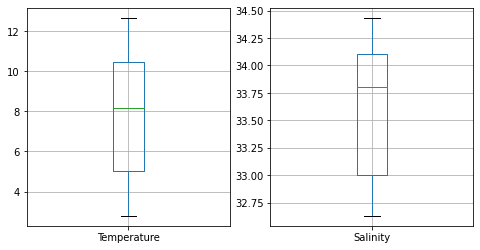

In [18]:
# 2.8 Perform univariate analysis - boxplots
fig,ax=plt.subplots(1,2,figsize=(8,4))
df_train[['Temperature']].boxplot(ax=ax[0])
df_train[['Salinity']].boxplot(ax=ax[1])
plt.show()

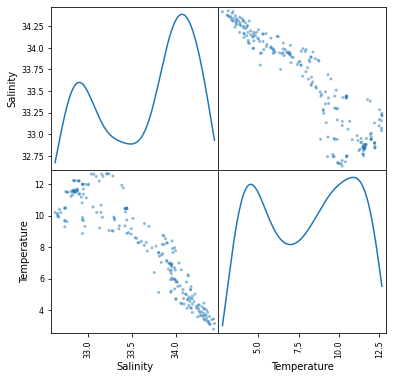

In [20]:
# 2.9 Perform bivariate analysis - scatter matrix
#kde da la distribucion
pd.plotting.scatter_matrix(df_train,diagonal='kde',figsize=(6,6))
plt.show()

In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
#tenemos una única variable por eso no se hace en este caso

In [ ]:
# 2.11 Perform multivariate analysis - VIF
#tenemos una única variable por eso no se hace en este caso

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals
#mi objetivo es pronosticar en base a qué.
#utilizo los modelos que corresponda. Hay que ir escribiendo el objetivo y como se hará

In [21]:
# 3.1 Perform model fit - A
#cuando es una única variable predictora 
#R2 : proportion of the variance in DV explained by IV
sklm=LinearRegression()
sklm.fit(X_train.to_frame(),y_train)
score=sklm.score(X_train.to_frame(),y_train)
print(f'score is{score: .4f}')




score is 0.8454


In [23]:
# se corre en dataset de prueba
#RMSE: Root mean squared error
predictions=sklm.predict(X_test.to_frame())
print(f'The R2 score is:{r2_score(y_test,predictions)}')
print(f'The RMSE is: {mean_squared_error(y_test,predictions,squared=False)}')

The R2 score is:0.7863151702808187
The RMSE is: 1.316206920253402


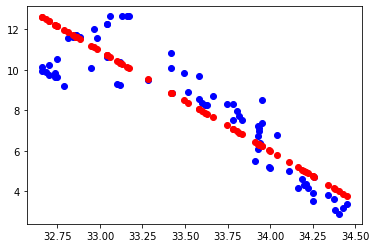

In [24]:
plt.scatter(x=X_test,y=y_test,color='Blue')
plt.scatter(x=X_test,y=predictions,color='Red')
plt.show()

In [25]:
# 3.2 Perform model fit - B
results=smf.ols('Temperature ~ Salinity', data=df_train).fit()
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.31e-92
Time:                        22:17:38   Log-Likelihood:                -355.70
No. Observations:                 225   AIC:                             715.4
Df Residuals:                     223   BIC:                             722.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.3618      4.738     36.590      0.0

In [ ]:
# 3.3 Calculate metrics on model A


In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions
"""Hemos utilizado los siguients pasos para calcular.... Tomamos la decisión de quitar valores por.... Hemos encontrado....

contar la historia y se realiza la conclusión y recomendaciones"""



